Populating the interactive namespace from numpy and matplotlib


C:\Users\op\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\op\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


<Figure size 432x288 with 0 Axes>

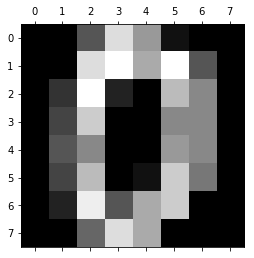

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble, cross_validation, learning_curve,  datasets, metrics, tree 
from sklearn.datasets import load_digits


#определяем наш объект
digits = load_digits()
#выводим изображения для наглядности
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 









In [2]:
#определяем матрицу признаков, из уловий задачи поле Data должно являться матрицей признаков
X = digits['data']
#ответы на обучающей выборке
y = digits['target']


#разбиваем обучающую выборку на две подвыборки - обучающую и тестовую, также и целевые метки разбиваем на две подвыборки
#train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, y,
#                                                                                     test_size = 0.3,
#                                                                                     random_state = 1)

#определяем модель ВЕРШИНЫ дерева
clf = tree.DecisionTreeClassifier()
#обучаем модель
#clf.fit(train_data, train_labels)

#сохраняем предсказания на основе тестовой выборки в отдельную переменную
#predictions = clf.predict(test_data)

#print metrics.accuracy_score(test_labels, predictions)

#cross_validation.cross_val_score (clf)



#измеряем качество   работы решающего дерева с помощью cross_val_score
#метод fit здесь не нужен, так как мы передаем функцию в качестве аргумента, т.е. само всё обучается
massiv_ocenok = cross_validation.cross_val_score(clf, X, y=y, cv = 10)

massiv_ocenok.mean()
 
 

0.8303290858230152

In [3]:
#теперь применим бэггинг над решающими деревьями
from sklearn.ensemble import BaggingClassifier


#короче бэггинг - это такой агрегатор алгоритмов. в данном случае в качестве базового алгоритма выступает дерево решений clf
#мы делаем 100 таких алгоритмов. задача бэггинга - обучить каждый из 100 деревьев на случайной подвыборке из общей выборки
clf_bagging = BaggingClassifier (clf, n_estimators = 100)

#теперь в оценочную модель уже подставляем не базовый алгоритм, а аггрегатор алгоритма, которым является беггинг
massiv_ocenok = cross_validation.cross_val_score(clf_bagging, X, y=y, cv = 10)

massiv_ocenok.mean()




0.9254795022479689

In [13]:
#теперь применим бэггинг над решающими деревьями, но с ограничением на количество признаков
d = int(np.sqrt (X.shape[1]))#количество признаков равно количеству столбцов матрицы, записываем в отдельную переменную

clf_bagging = BaggingClassifier (clf, n_estimators = 100, max_features = d )# max_features - максимальное количество признаков из обучающей выборки для обучения конкретного алгоритма

#теперь в оценочную модель уже подставляем не базовый алгоритм, а аггрегатор алгоритма, которым является беггинг
massiv_ocenok = cross_validation.cross_val_score(clf_bagging, X, y=y, cv = 10)

massiv_ocenok.mean()

#print int(np.sqrt (X.shape[1]))


0.9320677733158547

In [19]:
#попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. 
clf = tree.DecisionTreeClassifier( max_features = 'sqrt')# тут можно ещё добавить параметр splitter =  'random' иногда это влияет на качество модели

clf_bagging = BaggingClassifier (clf, n_estimators = 100)

massiv_ocenok = cross_validation.cross_val_score(clf_bagging, X, y=y, cv = 10)

massiv_ocenok.mean()

0.951659534381281

In [21]:
#теперь обучим случайный лес на прежнем датасете


clf = ensemble.RandomForestClassifier ()
massiv_ocenok = cross_validation.cross_val_score(clf, X, y=y, cv = 10)
massiv_ocenok.mean()

0.9221021396579673

In [22]:
#теперь обучим случайный лес со 100 деревьями

clf = ensemble.RandomForestClassifier (n_estimators = 100)
massiv_ocenok = cross_validation.cross_val_score(clf, X, y=y, cv = 10)
massiv_ocenok.mean()

0.9532931345514735

In [23]:
#теперь обучим случайный лес  на 5 деревьях  

clf = ensemble.RandomForestClassifier (n_estimators = 5)
massiv_ocenok = cross_validation.cross_val_score(clf, X, y=y, cv = 10)
massiv_ocenok.mean()

0.881312306195629

In [ ]:
#ответы на 5 вопрос 1 2 3 5 7